<a href="https://colab.research.google.com/github/uccaoeo/Kaggle-Learning/blob/main/Heart%20Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from google.colab import files
import io
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy

#Suppressing all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [5]:
cf= pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [6]:
df = cf.copy()

In [8]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


###Heart Failure Prediction with Various Machine Learning Models
Dilated cardiomyopathy (DCM) is the most common type of heart disease, occurring mostly in adults 20 to 60. 
It affects the heart's ventricles and atria, the lower and upper chambers of the heart, respectively.
Frequently the disease starts in the left ventricle, the heart's main pumping chamber.
The heart muscle begins to dilate, meaning it stretches and becomes thinner. Consequently, the inside of the chamber enlarges. 
The problem often spreads to the right ventricle and then to the atria. As the heart chambers dilate, the heart muscle doesn't contract normally and cannot pump blood very well.

####Source: Heart.org

##Aim of this notebook 

In this notebook, I visualize the distribution of the variables in the Heart Failure Prediction dataset and explore their relationship with the target variable DEATH_EVENT. Based on the result of this analysis, I define seven machine learning models to compare their performance on this dataset to predict the target variable using the most correlated subset of variables from the dataset.

###The dataset has observations of 13 variables for 299 patients

Variables in this dataset
*   Age: Age of the patient in years
*   Anaemia: Decrease of red blood cells or hemoglobin (0:Reduced or 1:Normal)
*   creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
*   Diabetes: If the patient has diabetes (0:No or 1:Yes)
*   ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
*   high_blood_pressure: If the patient has hypertension (0:No or 1:Yes)
*   platelets: Platelets in the blood (kiloplatelets/mL)
*   serum_creatinine: Level of serum creatinine in the blood (mg/dL)
*   serum_sodium: Level of serum sodium in the blood (mEq/L)
*   sex: Biological sex of the patient (0:Female or 1:Male)
*   smoking: If the patient is a smoker (0:No or 1: Yes)
*   time: Follow-up period in days
*   death_event: If the patient survived till the end of follow-up period (0:No or 1:Yes )

Fortunately, the dataset has no missing values! Thanks to the people who created it.


























In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
import plotly.express as px
fig = px.pie(df, names='DEATH_EVENT', title='Distribution of Death Events in Patients',width=600, height=400)
fig.show()

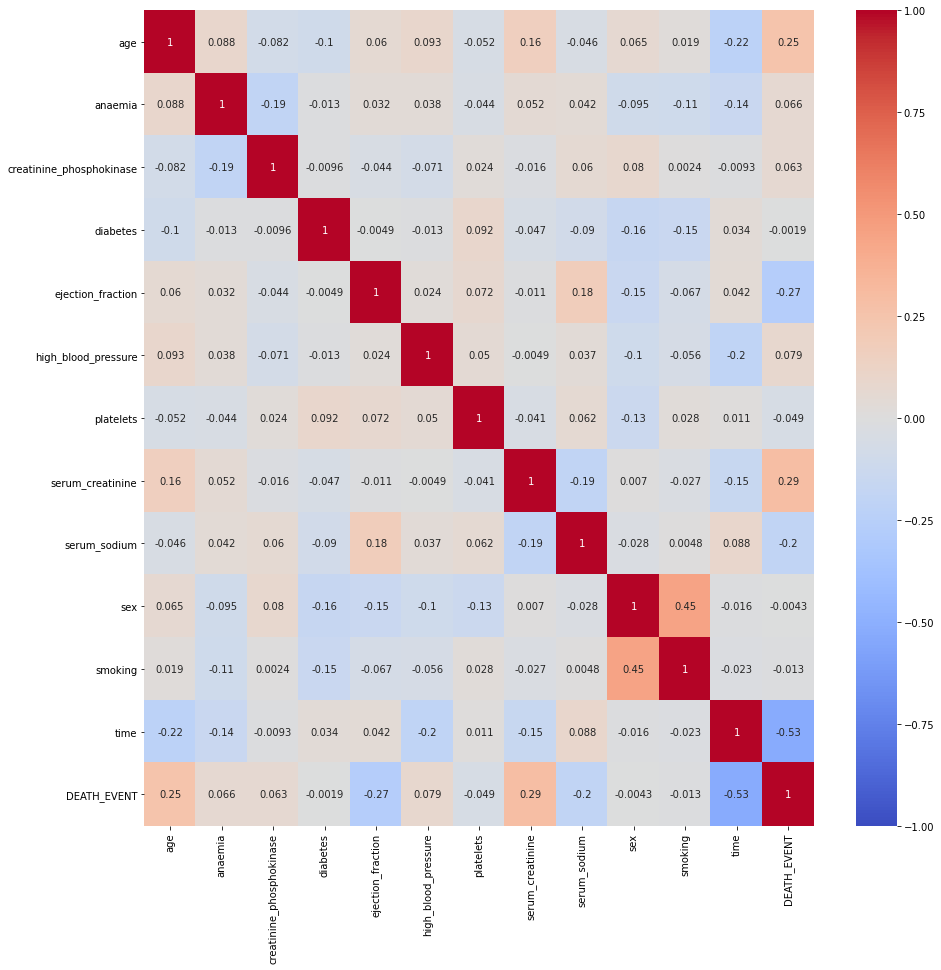

In [13]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [14]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.25
ejection_fraction   -0.27
serum_creatinine     0.29
serum_sodium        -0.20
time                -0.53
DEATH_EVENT          1.00
Name: DEATH_EVENT, dtype: float64

The features 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', and 'time' have a considerable correlation with 'DEATH_EVENT'

Model Training and Prediction

###Model Training and Prediction

In [15]:
# Trial and Error revealed that not considering Age column improves accuracy

x = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
x = (x-x.mean())/x.std()
y = df['DEATH_EVENT']

#Spliting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

###Logistic Regression

Linear Regression Success Rate : 88.33%


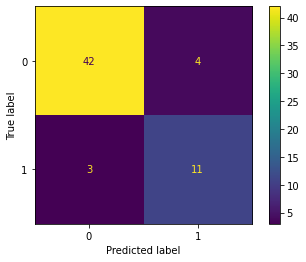

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()

###Gradient Booster Classifier

Gradient Booster Classifier Success Rate : 83.33%


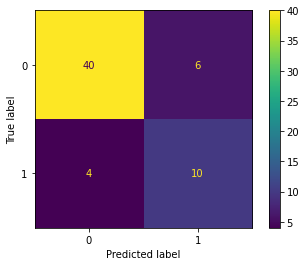

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()

###Random Forest Classifier

Random Forest Classifier Success Rate : 85.00%


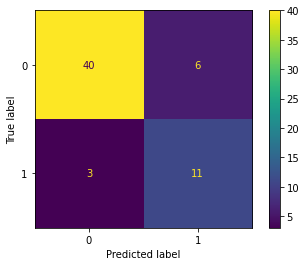

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

####(Random Forest rate varies on each execution from 88.33% to 91.67%)

###Support Vector Machine

Support Vector Machine Success Rate : 88.33%


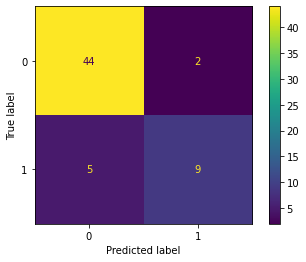

In [19]:


from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

###K Nearest Neighbors

K Nearest Neighbors Top 5 Success Rates:
[90.0, 88.33, 88.33, 88.33, 88.33]


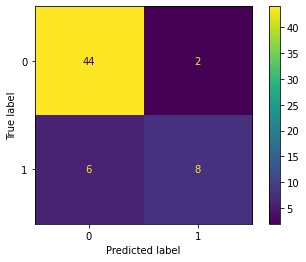

In [20]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p5=knn.predict(x_test)
    s5=accuracy_score(y_test,p5)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

###Decision Tree Classifier

Decision Tree Classifier Top 5 Success Rates:
[86.67, 86.67, 86.67, 86.67, 83.33]


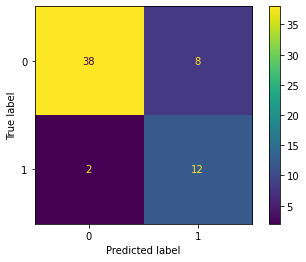

In [21]:
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()

###Extra Gradient Booster Classifier

In [23]:
from xgboost import XGBClassifier
#from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic')

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

grid = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=4, 
                    cv=skf.split(x_train,y_train), verbose=0 )

grid.fit(x_train,y_train,early_stopping_rounds=30,eval_set=[(x_test, y_test)])
p2x = grid.best_estimator_.predict(x_test)
s2x=accuracy_score(y_test,p2x)

[0]	validation_0-error:0.133333
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.133333
[2]	validation_0-error:0.233333
[3]	validation_0-error:0.25
[4]	validation_0-error:0.133333
[5]	validation_0-error:0.1
[6]	validation_0-error:0.116667
[7]	validation_0-error:0.133333
[8]	validation_0-error:0.116667
[9]	validation_0-error:0.1
[10]	validation_0-error:0.1
[11]	validation_0-error:0.1
[12]	validation_0-error:0.1
[13]	validation_0-error:0.116667
[14]	validation_0-error:0.116667
[15]	validation_0-error:0.1
[16]	validation_0-error:0.066667
[17]	validation_0-error:0.083333
[18]	validation_0-error:0.066667
[19]	validation_0-error:0.066667
[20]	validation_0-error:0.066667
[21]	validation_0-error:0.066667
[22]	validation_0-error:0.05
[23]	validation_0-error:0.05
[24]	validation_0-error:0.066667
[25]	validation_0-error:0.066667
[26]	validation_0-error:0.066667
[27]	validation_0-error:0.05
[28]	validation_0-error:0.05
[29]	validation_0-error:0.066667
[30]

Extra Gradient Booster Classifier Success Rate : 95.00%


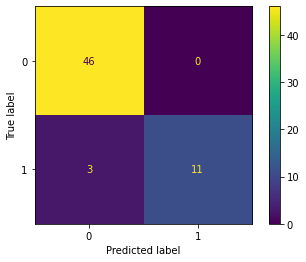

In [24]:
print("Extra Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2x))
plot_confusion_matrix(grid.best_estimator_, x_test, y_test)
plt.show()

In [27]:
print(f'Gradient Booster Classifier: {round(100*s2, 2)}%\n \
Decision Tree Classifier: {round(sorted(list1, reverse=True)[0], 2)}%\n \
Logistic Regression: {round(100*s1, 2)}%\n \
Support Vector Machine: {round(100*s4, 2)}%\n \
Random Forest Classifier: {round(100*s3, 2)}%\n \
K Nearest Neighbors: {round(sorted(scorelist,reverse=True)[0], 2)}%\n \
Extra Gradient Booster Classifier: {round(100*s2x, 2)}%')

Gradient Booster Classifier: 83.33%
 Decision Tree Classifier: 86.67%
 Logistic Regression: 88.33%
 Support Vector Machine: 88.33%
 Random Forest Classifier: 85.0%
 K Nearest Neighbors: 90.0%
 Extra Gradient Booster Classifier: 95.0%


###Thanks for reading my notebook!😃